## Exploratory Data Analysis (EDA)

This section investigates the merged dataset containing annual UFO sightings and global stress events between 1947 and 2013. The goal is to explore distributions, trends, and potential relationships between societal stress and reported UFO activity. Both visual and statistical methods are employed.


We begin by importing the libraries that we wish to use for our analysis:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")

# Ensure inline plots display in Jupyter Notebooks
%matplotlib inline

Our first step is to load our cleaned *merged_ufo_stress_data.csv* dataset. 
As before we will use the *.read_csv* method for this:

In [2]:
# Load the merged UFO and stress data
merged_df = pd.read_csv("../data/clean/merged_ufo_stress_data.csv")

Now that we have loaded the dataset to memory, we can now preview the structure of our dataset:

In [5]:
# preview the structure of the dataset
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                67 non-null     int64
 1   sightings_per_year  67 non-null     int64
 2   stress_event_count  67 non-null     int64
 3   severity_sum        67 non-null     int64
dtypes: int64(4)
memory usage: 2.2 KB


,year,sightings_per_year,stress_event_count,severity_sum
count,67.000000,67.000000,67.000000,67.000000
mean,1980.000000,1153.865672,0.388060,1.238806
std,19.485037,1844.550647,0.549248,1.891685
min,1947.000000,7.000000,0.000000,0.000000
25%,1963.500000,85.000000,0.000000,0.000000
50%,1980.000000,223.000000,0.000000,0.000000
75%,1996.500000,1154.000000,1.000000,3.000000
max,2013.000000,7308.000000,2.000000,8.000000


### Initial Observations: UFO Sightings Distribution

While the dataset includes only 67 annual records (1947–2013), it is appropriate for the project’s exploratory purpose. The analysis is designed to test a thematic hypothesis, not build predictive models. All findings are interpreted with this limitation in mind.

The **'sightings_per_year'** variable exhibits a highly skewed distribution. The mean (1153.87) is significantly higher than the median (223), and the maximum value (7308) is over 30 times greater than the lowest recorded value (7). This indicates the presence of several extreme outliers in the dataset, possibly concentrated in recent decades.

The standard deviation is very large relative to the mean, suggesting high variability in annual sighting counts. This supports the idea that UFO reporting increased substantially in the modern era, particularly post-1990s.

Based on this summary, the data appears to be non-normally distributed and heavily right-skewed. This observation will be supported by visualisation and statistical distribution tests in the following sections.

Let us now produce a Histogram of our 'sightings_per_year' to visually confirm our initial findings. We will use the Python library, Seaborn for this purpose.

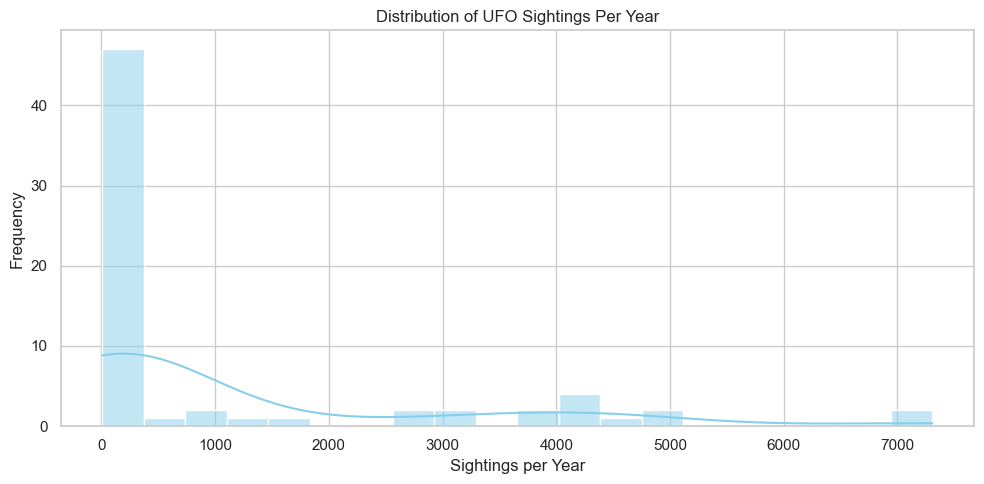

In [ ]:
# Create a histogram of 'sightings_per_year'
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['sightings_per_year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of UFO Sightings Per Year')
plt.xlabel('Sightings per Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() # code referenced from Code Institute's LMS 

### Descriptive Statistics: sightings_per_year

Immediately we can see that the data has a strong positive skew with a long tail. We see that the majority of years show UFO sightings well under 1000, but long right tail stretching all the way up to 7300+, confirms the presence of severe outliers, most likely in the later years (most likely 2000s to early 2010s).

We can see that there is a high concentration of sightings at lower values. ~70% of the years fall under the first few bins, most likely under 500 sightings per year. This reinforces our earlier findings of 85 in our 25th percentile, with our median value of 223 sightings per year. 

In terms of outliers, we notice that there is a sparse, but notable number of years with sightings exceeding 3000, 5000 and even over 7000! These likely have a disproportionate effect on our mean average (~1153.87), and also on any potential linear regression model. 

We notice overall that our data distribution is to be considered 'not normal', as our plot shows a strong asymmetric tendency and is not bell-shaped as we would expect in normally distributed data. The KDE overlay further illustrates this non-normality, showing a sharply skewed density curve. These findings are consistent with the summary statistics and will be taken into account in further analysis, particularly when considering correlation and regression modeling.

Let us now produce a Box plot to further illustrate our findings:

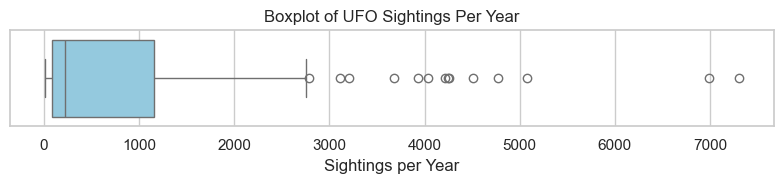

In [ ]:
# Create a box plot of 'sightings_per_year'
plt.figure(figsize=(8, 2))
sns.boxplot(x=merged_df['sightings_per_year'], color='skyblue')
plt.title('Boxplot of UFO Sightings Per Year')
plt.xlabel('Sightings per Year')
plt.tight_layout()
plt.show() # code referenced from Code Institute's LMS

### Boxplot Analysis: Sightings Per Year

The boxplot for 'sightings_per_year' highlights a pronounced positive skew in the data, with a dense concentration of values in the lower range and a long right-hand tail. 

The interquartile range (IQR) spans from approximately 85 to 1150 sightings, indicating that most years had relatively low reporting rates. However, several extreme outliers are present, with annual sightings exceeding 3000, 5000, and even 7000 in rare cases.

These outliers represent years of exceptional reporting activity and have a strong influence on the overall distribution. This supports earlier conclusions from the histogram and summary statistics, confirming that the data is not normally distributed and is heavily influenced by a handful of high-activity years.

Now that we have addressed our data distribution, let us now consider the kurtosis of our data. 


In [ ]:
# Calculte kurtosis value for 'sightings_per_year'
from scipy.stats import kurtosis
kurtosis_value = kurtosis(merged_df['sightings_per_year'], fisher=True)  # Fisher's definition (normal = 0)
print(f"Kurtosis of 'sightings_per_year': {kurtosis_value:.2f}") # Code provided by Copilot.

Kurtosis of 'sightings_per_year': 1.87


### Kurtosis of Sightings Per Year

The kurtosis value for 'sightings_per_year' is 1.87, which is below the normal distribution benchmark of 3. This indicates a **platykurtic** distribution — one that is flatter and more evenly spread than a normal curve, with lighter tails and fewer extreme values overall.

However, this result should be interpreted in context. While the statistical kurtosis suggests fewer outliers than a typical normal distribution, the earlier histogram and boxplot show a clear **positive skew** and a **series of high-value outliers** in later years. This implies that although the overall distribution is broad and flat, a small number of extreme values still significantly influence the dataset's shape.


Now that we have analysed our 'sightings_per_year' variable, let us move on to conducting the same univariate testing for our remaining variables. Next, let us look at 'stress_event_count'.

### Descriptive Statistics: stress_event_count

The 'stress_event_count' variable is heavily right-skewed and highly sparse. The mean is 0.39, with both the median and 25th percentile at 0, indicating that the majority of years had no recorded global stress events.

Only a small number of years registered 1 or 2 events, and no year recorded more than 2. The standard deviation is relatively low (0.55), and the variable only takes on three values: 0, 1, or 2.

This suggests that 'stress_event_count' may function more as a categorical or binary-like indicator, rather than a continuous predictor. Its use in regression may be limited unless it aligns meaningfully with spikes in UFO sightings.

This variable functions more as a discrete event frequency count and lacks the distributional properties required for continuous modelling. It will be most useful in combination with the 'severity_sum' metric, which provides a more nuanced measure of the impact of stress events each year.

Let us now create a histogram plot to visualise our findings:

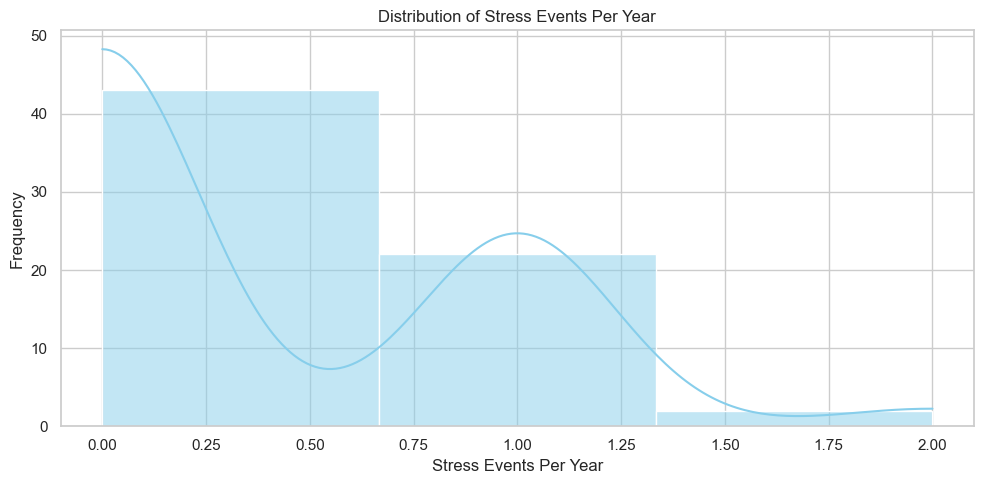

In [13]:
# Create a histogram of 'stress_event_count'
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['stress_event_count'], bins=3, kde=True, color='skyblue')
plt.title('Distribution of Stress Events Per Year')
plt.xlabel('Stress Events Per Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

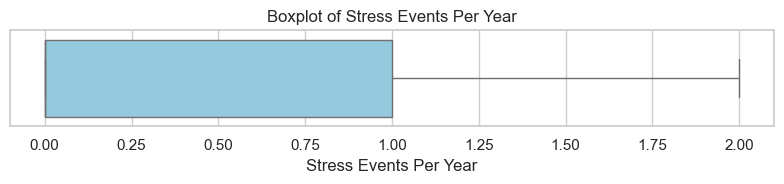

In [14]:
# Create a box plot of 'stress_event_count'
plt.figure(figsize=(8, 2))
sns.boxplot(x=merged_df['stress_event_count'], color='skyblue')
plt.title('Boxplot of Stress Events Per Year')
plt.xlabel('Stress Events Per Year')
plt.tight_layout()
plt.show()

### Boxplot Analysis: Stress Events Per Year

The boxplot for 'stress_event_count' illustrates a strongly compressed distribution, reflecting the sparse and low-frequency nature of the variable. Most of the data lies between 0 and 1 stress event per year, with a maximum of 2.

The distribution shows no visible outliers, but the long left tail confirms that a majority of years recorded **no stress events** at all. This aligns with the earlier summary statistics, where the median and 25th percentile were both 0. The lack of variation and tight clustering highlight the discrete and infrequent nature of global stress events in this dataset.

Due to its discrete and low-cardinality nature, calculating kurtosis for 'stress_event_count' would not be considered statistically meaningful. This variable only takes on values of 0, 1, or 2, and is better described through frequency, boxplot visualisation, and context-specific interpretation.


Let us now consider our 'severity_sum' metric for descriptive statistical analysis. 
Let us quickly refresh ourselves with our stats viewed earlier:

In [ ]:
# Descriptive statistics for 'severity_sum'
merged_df["severity_sum"].describe() 

count    67.000000
mean      1.238806
std       1.891685
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max       8.000000
Name: severity_sum, dtype: float64

### Descriptive Statistics: severity_sum


The 'severity_sum' variable exhibits a strongly right-skewed distribution, with a mean of 1.24 but a median of 0. This indicates that at least half of all years recorded no global stress events, while a minority experienced high-stress years with severity totals up to 8.

The standard deviation (1.89) exceeds the mean, suggesting high variability in the intensity of global stress across the years. This characteristic, along with the wide range and asymmetric distribution, highlights the importance of this variable as a potentially meaningful predictor in regression analysis.

Let us again perform the same tests that we've been applying to our previous metrics, in order to give us a clearer, visual reference and interpretation of our findings:


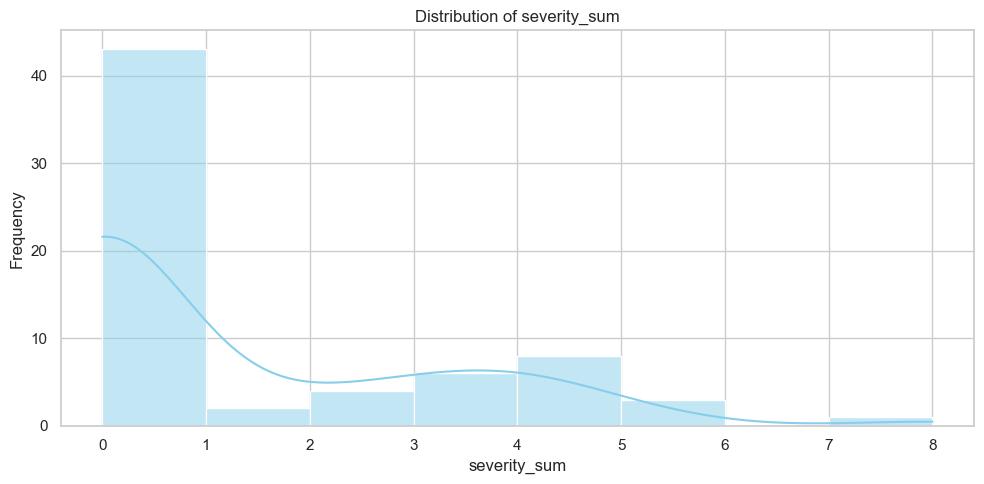

In [19]:
# Create a histogram of 'severity_sum'
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['severity_sum'], bins=8, kde=True, color='skyblue')
plt.title('Distribution of severity_sum')
plt.xlabel('severity_sum')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Histogram Analysis: 'severity_sum'

The histogram of 'severity_sum' shows a strongly right-skewed distribution, with the majority of years recording no stress events at all. A significant concentration of data exists at the zero point, while a long tail extends toward higher severity scores.

This skew is visually reinforced by the KDE curve, which drops sharply after zero, but rises slightly again around values of 3–5 before tapering off. These higher-severity years are relatively rare but contribute heavily to the variability of the dataset. 

This makes 'severity_sum' a more informative variable than 'stress_event_count' for assessing potential relationships with UFO sightings, although the non-normal shape and heavy skew reinforce the need for caution when applying parametric methods; but also highlights the potential for meaningful insight through regression or trend analysis.

Let us now see this distribution as a box plot:


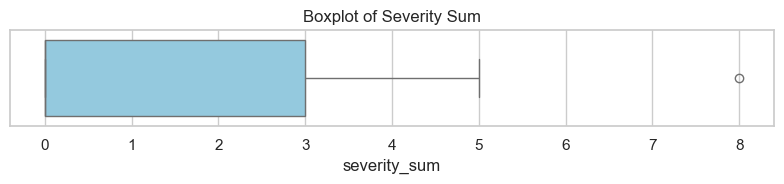

In [20]:
# Create a box plot of 'severity_sum'
plt.figure(figsize=(8, 2))
sns.boxplot(x=merged_df['severity_sum'], color='skyblue')
plt.title('Boxplot of Severity Sum')
plt.xlabel('severity_sum')
plt.tight_layout()
plt.show()

### Boxplot Analysis: 'severity_sum'

The boxplot for 'severity_sum' confirms a positively skewed distribution with a large portion of the data concentrated at low values. 
Both the lower quartile (25%) and median (50%) sit at 0, indicating that the majority of years had no recorded global stress events.

The upper quartile reaches a severity score of 5, suggesting that only a minority of years experienced moderate to high stress. A single outlier year with a severity score of 8 stands apart, representing a particularly turbulent global period.

This distribution confirms high asymmetry and supports the earlier histogram findings, further validating the decision to use this feature in correlation and regression analysis.


In [ ]:
# Calculte kurtosis value for 'severity_sum'
from scipy.stats import kurtosis
kurtosis_value = kurtosis(merged_df['severity_sum'], fisher=True)  # Fisher's definition (normal = 0)
print(f"Kurtosis of 'severity_sum': {kurtosis_value:.2f}") # Code adapted from Copilot's earlier suggestion.

Kurtosis of 'severity_sum': 0.98


### Kurtosis of 'severity_sum'

The kurtosis score of 0.98 indicates a **platykurtic distribution**, meaning the values are more spread out and less sharply peaked than a normal distribution. This reflects the broad, low-frequency nature of stress severity across the dataset.

Although the distribution includes a few higher-severity years (and one outlier at 8), the overall shape shows relatively **light tails** and an even spread, confirming that extreme values are rare and that most years exhibit low or no global stress severity.


## Exploratory Data Analysis (EDA) Summary

The EDA phase focused on understanding the structure, distribution, and relationships within the cleaned and merged dataset. Particular attention was paid to identifying skew, outliers, variability, and the statistical suitability of each variable for correlation and regression.

### 1. 'sightings_per_year'
- **Distribution**: Strongly right-skewed with significant outliers in the upper range.
- **Descriptive Stats**: Mean = 1153.87, Median = 223, Max = 7308.
- **Kurtosis**: 1.87 (platykurtic) — flatter than normal, high spread, few sharp peaks.
- **Visuals**: Histogram and boxplot both show a concentration of low values and long-tailed outliers.
- **Interpretation**: Indicates a rising trend in UFO reports, likely influenced by external cultural factors; not normally distributed.

### 2. 'stress_event_count'
- **Distribution**: Sparse, discrete values (0, 1, or 2); 50% of years had zero events.
- **Descriptive Stats**: Mean = 0.39, Median = 0, Std Dev = 0.55.
- **Visuals**: Histogram and boxplot confirm strong concentration at 0 and minimal variation.
- **Interpretation**: Functions more like a categorical count. Not suitable for normality-based tests or complex modelling on its own.

### 3. 'severity_sum'
- **Distribution**: Positively skewed with a long tail and a single clear outlier (score = 8).
- **Descriptive Stats**: Mean = 1.24, Median = 0, Max = 8.
- **Kurtosis**: 0.98 (platykurtic) — flat-topped distribution with light tails.
- **Visuals**: Histogram shows heavy clustering at 0 with some moderate values; boxplot shows IQR between 0 and 5.
- **Interpretation**: Captures cumulative severity of global stress events and offers more continuous variation than 'stress_event_count'. Not normally distributed, but more suitable for regression modelling.

### Overall Summary
All three variables are **not normally distributed**, as evidenced by skewness, kurtosis, and visual inspection. The data contains **outliers, sparsity**, and **asymmetric distributions**, which will be accounted for in the later phase: correlation testing and regression modelling.

The 'sightings_per_year' and 'severity_sum' variables show the most promise for linear correlation analysis, while 'stress_event_count' may serve a supporting role in categorical or comparative contexts.

Next, now that we have focussed on the univariate analysis of our dataset, let us move on to conducting bivariate analysis by conducting a series of visualisations that we feel might be essential or useful for our project's goals.


## Bivariate Analysis:

In this section we will first take a look at time-series analysis of our data. Here we will gain insights into the number of sightings over time, relationships between variables, possibly highlighting any time-based trends, or unexpected anomalies. We aim to provide strong visual support for any correlation or regression work that follows. 

Initially, we will start by using Matplotlib to plot total UFO sightings over our timeframe (1947-2013).

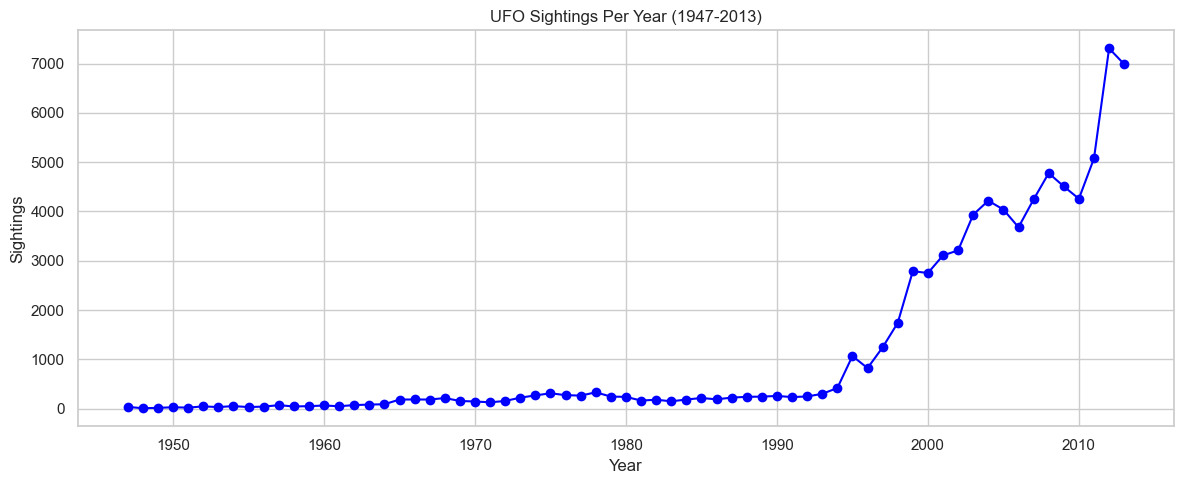

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(merged_df['year'], merged_df['sightings_per_year'], color='blue', marker='o')
plt.title('UFO Sightings Per Year (1947-2013)')
plt.xlabel('Year')
plt.ylabel('Sightings')
plt.grid(True)
plt.tight_layout()
plt.show()

### UFO Sightings Per Year (1947–2013):

This time series line chart reveals a dramatic long-term trend in the frequency of UFO sightings reported annually. 

The key observations include:

- **1947–1990**: Relatively low and stable levels of sightings, with only minor fluctuations. This suggests limited public awareness, media influence, or willingness to report such events.
  
- **1990s Surge**: Starting in the early 1990s, there is a **notable and sustained increase** in UFO reports, marking a potential shift in public interest or accessibility to reporting platforms given the rise of home computing accessibility, and the advent of the internet. 

- **2000s–2013**: Sightings continue to **rise sharply**, peaking around 2012 at over **7,000 reports** in a single year. This coincides with the growth of the internet, digital media, and popular culture coverage of UFO phenomena.

- **Interpretation**: This rising trend may reflect growing cultural interest, social media amplification, or changes in public receptiveness to the subject. It sets the stage for examining potential correlations with global stress indicators in the same timeframe.
